In [1]:
#!/usr/bin/env python
"""
Ways to evaluate partition function
Z_eval = 'Lap'         : Laplace approximation (default)
         'Lap+Sam[+P]' : Laplace approximation + importance sampling
         'GLap[+P]'    : generalized Laplace approximation
         'GLap+Sam[+P]': generalized Laplace approximation + importance sampling
         'Lap+Fey'     : Laplace approximation + Feynman diagrams

Methods of posterior sampling
pt_method =  None       : no sampling will be performed (default)
            'Lap[+P]'   : sampling from Laplace approximation + importance weight
            'GLap[+P]'  : sampling from generalized Laplace approximation + importance weight
            'MMC'       : sampling using Metropolis Monte Carlo

Note: [+P] means this task can be done in parallel
"""
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
sys.path.append('../code/')
import utils
TINY_FLOAT64 = sp.finfo(sp.float64).tiny

execfile('test_header.py')

num_trials = 100

N = 10
bbox = [-6,6]
Z_eval = 'Lap'
num_Z_samples = 0
pt_method = 'Lap'
num_pt_samples = 10**4

gds = np.zeros(num_trials)
H_bias = np.zeros([num_trials, 2])
H_spread = np.zeros([num_trials, 2])

for i in range(num_trials):

    print ''
    print '#', i
    
    results = TestCase(N=N,
                       data_seed=None,
                       G=100,
                       alpha=3,
                       bbox=bbox,
                       Z_eval=Z_eval,
                       num_Z_samples=num_Z_samples,
                       DT_MAX=1.0,
                       pt_method=pt_method,
                       num_pt_samples=num_pt_samples,
                       fix_t_at_t_star=False
                       ).run()

    xs = results.results.bin_centers
    Q_true = results.Q_true
    Q_star = results.results.Q_star
    Q_samples = results.results.Q_samples
    sample_weights = results.results.phi_weights
    
    # Sample according to weights
    #indices = range(Q_samples.shape[1])
    #sample_probs = sample_weights/sum(sample_weights)
    #samples = np.random.choice(indices, size=100, p=sample_probs)
    #plt.plot(xs, Q_samples[:,samples])
    #plt.show()

    # Compute geo-distance between Q_star and Q_true
    gd = utils.geo_dist(Q_star, Q_true)
    gds[i] = gd

    # Compute entropy of Q_true and Q_samples
    h = xs[1] - xs[0]
    H_true = -sp.sum(Q_true * sp.log2(Q_true+TINY_FLOAT64)) * h
    H_samples = np.zeros(num_pt_samples)
    for k in range(num_pt_samples):
        Q_k = Q_samples[:,k]
        H_samples[k] = -sp.sum(Q_k * sp.log2(Q_k+TINY_FLOAT64)) * h
    # Naive bias & spread
    H_mean_naive = sp.mean(H_samples)
    H_std_naive = sp.std(H_samples)
    H_bias[i,0] = H_mean_naive - H_true
    H_spread[i,0] = H_std_naive
    # Weighted bias & spread
    H_mean_weighted = sp.sum(H_samples * sample_weights) / sp.sum(sample_weights)
    H_std_weighted = sp.sqrt(sp.sum(H_samples**2 * sample_weights) / sp.sum(sample_weights) - H_mean_weighted**2)
    H_bias[i,1] = H_mean_weighted - H_true
    H_spread[i,1] = H_std_weighted
    
# Plot 0: geo-distance
x = np.zeros(num_trials)
plt.figure(0)
plt.scatter(x, gds, color='black')
plt.xlabel('')
plt.ylabel('geo-distance (rad)')
plt.savefig('gd')

# Plot 1: H bias (naive vs weighted)
x = np.array([range(2)]*num_trials)
plt.figure(1)
for j in range(2):
    plt.scatter(x[:,j], H_bias[:,j], color='black')
plt.xlabel('naive vs weighted')
plt.ylabel('H bias (bits)')
plt.title('H_true = %.2f bits' % H_true)
plt.savefig('H_bias')

# Plot 2: H spread (naive vs weighted)
counter = 0.
for i in range(num_trials):
    bias = H_bias[i,0]
    spread = H_spread[i,0]
    if abs(bias) < spread:
        counter += 1
success_rate_naive = counter / num_trials * 100

counter = 0.
for i in range(num_trials):
    bias = H_bias[i,1]
    spread = H_spread[i,1]
    if abs(bias) < spread:
        counter += 1
success_rate_weighted = counter / num_trials * 100        

title_str = 'Naive: %.1f%%   Weighted: %.1f%%' % (success_rate_naive, success_rate_weighted)

x = np.array([range(2)]*num_trials)
plt.figure(2)
for j in range(2):
    plt.scatter(x[:,j], H_spread[:,j], color='black')
plt.xlabel('naive vs weighted')
plt.ylabel('H spread (bits)')
plt.title(title_str)
plt.savefig('H_spread')

print ''
print '--- done ---'
print ''


# 0
t_start = -8.51
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-20.12) < log_E_max (0.10) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.71
Outcome: good.
------
ERROR: geo_dists

# 1
t_start = -8.51
Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-19.99) < log_E_max (0.43) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -12.94
Outcome: good.
------
ERROR: geo_dists

# 2
t_start = -8.51
Q_end = M: geo_dist (0.07) <= resolution (0.10)
Q_end = R: log_E (-20.30) < log_E_max (0.24) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -14.82
Outcome: good.
------
ERROR: geo_dists

# 3
t_start = -8.51
Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-18.93) < log_E_max (2.10) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -10.49
Outcome: good.
------
ERROR: geo_dists

# 4
t_start = -8.51
Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-20.23) < log_E_max (-0.01) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERR

Succeeded!  t_star = -11.98
Outcome: good.
------
ERROR: geo_dists

# 41
t_start = -8.51
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-22.35) < log_E_max (-0.47) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 42
t_start = -8.51
Q_end = M: geo_dist (0.10) <= resolution (0.10)
Q_end = R: log_E (-18.80) < log_E_max (1.30) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -9.95
Outcome: good.
------
ERROR: geo_dists

# 43
t_start = -8.51
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-19.77) < log_E_max (2.04) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -10.16
Outcome: good.
------
ERROR: geo_dists

# 44
t_start = -8.51
Q_end = M: geo_dist (0.07) <= resolution (0.10)
Q_end = R: log_E (-20.50) < log_E_max (0.16) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -14.85
Outcome: good.
------
ERROR: geo_dists

# 45
t_start = -8.51
Q_end = M: geo_dist (0.06) <= resolution (0.10)
Q_end = R: log_E (-20.02) < log_E_max (0.15) - LO

t_start = -8.51
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-20.05) < log_E_max (0.59) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.34
Outcome: good.
------
ERROR: geo_dists

# 82
t_start = -8.51
Q_end = M: geo_dist (0.06) <= resolution (0.10)
Q_end = R: log_E (-21.57) < log_E_max (0.19) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -10.80
Outcome: good.
------
ERROR: geo_dists

# 83
t_start = -8.51
Q_end = M: geo_dist (0.10) <= resolution (0.10)
Q_end = R: log_E (-20.68) < log_E_max (-0.44) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 84
t_start = -8.51
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-20.98) < log_E_max (0.86) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -9.88
Outcome: good.
------
ERROR: geo_dists

# 85
t_start = -8.51
Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-21.61) < log_E_max (-0.11) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR:

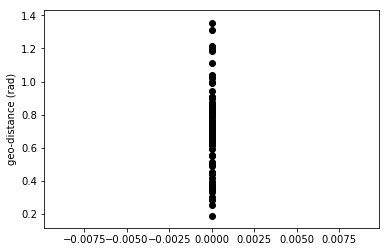

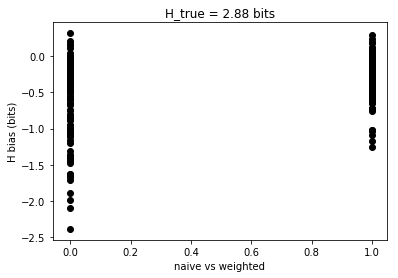

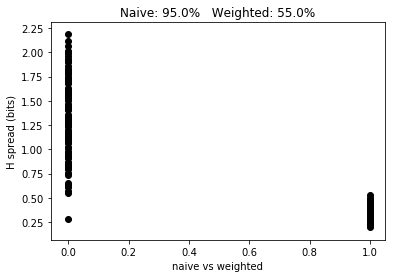

In [2]:
plt.show()

In [3]:
import pandas as pd

#df_gd = pd.DataFrame(data=gds)
#df_gd.index.name = '# trial'
#df_gd.to_csv('gd.txt', sep='\t')

df_H_bias = pd.DataFrame(data=H_bias, columns=['Naive','Weighted'])
df_H_bias.index.name = '# trial'
df_H_bias.to_csv('H_bias.txt', sep='\t')

df_H_spread = pd.DataFrame(data=H_spread, columns=['Naive','Weighted'])
df_H_spread.index.name = '# trial'
df_H_spread.to_csv('H_spread.txt', sep='\t')

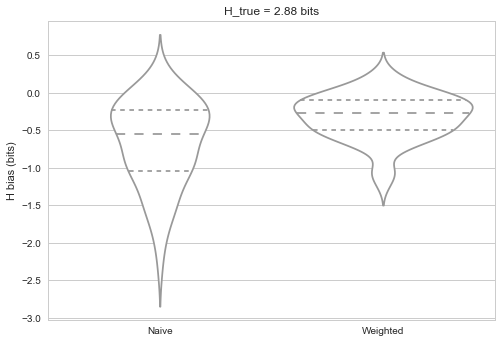

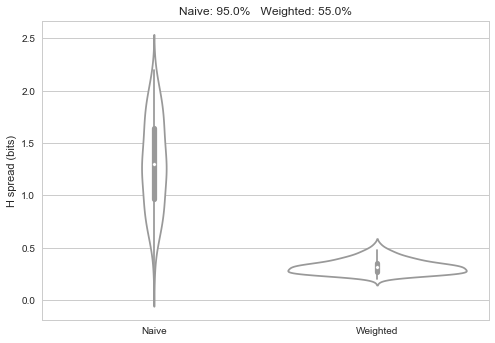

In [4]:
import seaborn as sns
%matplotlib inline
plt.ion()

sns.set(style='whitegrid')

#plt.figure(3)
#fig_gd = sns.violinplot(data=df_gd, color='white', inner='quart')
#fig_gd.set_ylabel('geo-distance (rad)')
#plt.savefig('gd_vp')

plt.figure(4)
fig_H_bias = sns.violinplot(data=df_H_bias, color='white', inner='quart')
#fig_H_bias.set_ylim(-2.0, 0.2)
fig_H_bias.set_ylabel('H bias (bits)')
fig_H_bias.set_title('H_true = %.2f bits' % H_true)
plt.savefig('H_bias_vp')

plt.figure(5)
fig_H_spread = sns.violinplot(data=df_H_spread, color='white')
#fig_H_spread.set_ylim(0.0, 0.5)
fig_H_spread.set_ylabel('H spread (bits)')
fig_H_spread.set_title(title_str)
plt.savefig('H_spread_vp')